In [1]:
import pandas as pd

image_features=pd.read_csv("..\image_features_mahmood\image_features.csv")

In [2]:
image_features=image_features.drop(image_features.columns[0], axis=1)
image_features.head()

,PetID,Energy,Contrast,Correlation,Entropy,Mean,Std_Dev,num_checkpoints
0,cf8d949f9-2,0.035198,205.034612,0.957454,7.365074,133.539156,52.617205,371
1,61d4dc56b-12,0.037368,96.525711,0.983005,7.061479,88.483483,56.524143,187
2,53923463d-9,0.036733,29.713199,0.995834,6.920583,88.724871,60.340616,251
3,0173c456c-8,0.020710,108.010620,0.984549,7.500592,87.555181,61.033249,722
4,fa7c7d1be-3,0.023931,106.188246,0.982613,7.396937,121.323948,56.922695,486


In [3]:
#clean petID column
image_features["PetID"]=image_features["PetID"].str.split("-", expand=True)[0]

image_features.head(3)

,PetID,Energy,Contrast,Correlation,Entropy,Mean,Std_Dev,num_checkpoints
0,cf8d949f9,0.035198,205.034612,0.957454,7.365074,133.539156,52.617205,371
1,61d4dc56b,0.037368,96.525711,0.983005,7.061479,88.483483,56.524143,187
2,53923463d,0.036733,29.713199,0.995834,6.920583,88.724871,60.340616,251


In [4]:
#Group by ID
image_features_transformed=image_features.groupby("PetID", as_index=False).mean()

In [5]:
sentiment_features=pd.read_csv("..\description_sentiment_features_luis\processed_train.csv")
sentiment_features.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed,polarity,subjectivity
0,2,Nibble,3,299,0,1,1,7,0,1,...,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2,0.130357,0.407143
1,2,No Name Yet,1,265,0,1,1,2,0,2,...,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0,0.100000,0.400000
2,1,Brisco,1,307,0,1,2,7,0,2,...,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3,0.261905,0.542857
3,1,Miko,4,307,0,2,1,2,0,2,...,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2,0.341146,0.437500
4,1,Hunter,1,307,0,1,1,0,0,2,...,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2,0.400000,0.743750


In [6]:
sentiment_features.shape

(14993, 26)

In [7]:
image_features.shape, image_features_transformed.shape

((72776, 8), (18510, 8))

In [8]:
all_data=sentiment_features.merge(image_features_transformed, how="left", on="PetID")
all_data.head(3)

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,AdoptionSpeed,polarity,subjectivity,Energy,Contrast,Correlation,Entropy,Mean,Std_Dev,num_checkpoints
0,2,Nibble,3,299,0,1,1,7,0,1,...,2,0.130357,0.407143,0.035852,157.460689,0.986806,7.433718,95.712315,77.438182,482.000000
1,2,No Name Yet,1,265,0,1,1,2,0,2,...,0,0.100000,0.400000,0.022545,63.340863,0.993091,7.714046,102.676512,68.204360,187.500000
2,1,Brisco,1,307,0,1,2,7,0,2,...,3,0.261905,0.542857,0.030182,78.109415,0.982029,7.185988,142.957730,48.593305,296.857143


In [9]:
all_data.columns , len(all_data.columns)

(Index(['Type', 'Name', 'Age', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2',
        'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
        'Sterilized', 'Health', 'Quantity', 'Fee', 'State', 'RescuerID',
        'VideoAmt', 'Description', 'PetID', 'PhotoAmt', 'AdoptionSpeed',
        'polarity', 'subjectivity', 'Energy', 'Contrast', 'Correlation',
        'Entropy', 'Mean', 'Std_Dev', 'num_checkpoints'],
       dtype='object'),
 33)

In [10]:
all_data[["Type",'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2',
       'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
       'Sterilized', 'Health',"State","PetID"]].head()

,Type,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,State,PetID
0,2,299,0,1,1,7,0,1,1,2,2,2,1,41326,86e1089a3
1,2,265,0,1,1,2,0,2,2,3,3,3,1,41401,6296e909a
2,1,307,0,1,2,7,0,2,2,1,1,2,1,41326,3422e4906
3,1,307,0,2,1,2,0,2,1,1,1,2,1,41401,5842f1ff5
4,1,307,0,1,1,0,0,2,1,2,2,2,1,41326,850a43f90


In [11]:
all_data["FurLength"].unique()

array([1, 2, 3], dtype=int64)

In [12]:
# Import libraries
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mlflow import MlflowClient
import mlflow

client = MlflowClient(tracking_uri="http://127.0.0.1:8080")
run_name = "First_pca_14_features"
mlflow.autolog() 
# Create a dummy dataframe with both categorical and numerical columns

columns_to_drop=["Name","Description","RescuerID"]
categorical_columns=["Type",'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2',
       'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
       'Sterilized', 'Health',"State","PetID"]
numerical_columns=['polarity', 'subjectivity', 'Energy', 'Contrast', 'Correlation',
       'Entropy', 'Mean', 'Std_Dev', 'num_checkpoints','PhotoAmt','VideoAmt',"Age","Quantity","Fee"]

target=all_data["AdoptionSpeed"]
all_data=all_data.drop("AdoptionSpeed", axis=1)



#simple filling
all_data[categorical_columns] = all_data[categorical_columns].fillna("unknown")
all_data.fillna(all_data[numerical_columns].median(), inplace=True)
#all_data=all_data.fillna(0)

#transformation
all_data[categorical_columns]=all_data[categorical_columns].astype(str)
all_data[numerical_columns]=all_data[numerical_columns].astype(float)

all_data=all_data.drop(columns_to_drop, axis=1)

#normalize numerical columns:

for column in numerical_columns:
  all_data[numerical_columns] = (all_data[numerical_columns] - all_data[numerical_columns].mean()) / all_data[numerical_columns].std()


# Perform one-hot encoding on the categorical columns
encoder = OneHotEncoder(sparse=False)
encoded_cat = encoder.fit_transform(all_data[categorical_columns])
encoded_cat = pd.DataFrame(encoded_cat, columns=encoder.get_feature_names_out(categorical_columns))

# Concatenate the encoded categorical columns and the numerical columns
X = pd.concat([encoded_cat, all_data[numerical_columns]], axis=1)

# Perform PCA on the combined data
pca = PCA(n_components=14, )
pca_data = pca.fit_transform(X)


2023/11/13 22:17:46 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
c:\Escritorio\Personal_brand\Data_Science\Portfolio\python_envs\projects_env\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
2023/11/13 22:18:34 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '119253e3e7c149d4a65f8873f1b6b5db', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2023/11/13 22:19:14 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Escritorio\Personal_brand\Data_Science\Portfolio\python_envs\projects_env\Lib\site-packages\mlflow\data\digest_utils.py:26: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead."
2023/1

In [13]:
pca_data = pd.DataFrame(pca_data)


In [14]:
print(pca.explained_variance_ratio_)

print(pca.components_)


[0.11663179 0.07489694 0.06708838 0.06452002 0.0578784  0.05402035
 0.04491721 0.04183083 0.04082406 0.03427079 0.03340837 0.02477001
 0.02339944 0.02220482]
[[ 8.17088966e-02 -8.17088966e-02  7.04708461e-05 ...  2.05822486e-02
   3.70447849e-02 -9.81425858e-03]
 [ 1.13474131e-01 -1.13474131e-01 -3.74954010e-06 ...  3.73812961e-01
  -3.83703739e-01  1.78497343e-01]
 [ 3.06233836e-02 -3.06233836e-02  3.41109062e-05 ...  2.93767982e-01
  -2.44279368e-01  1.66007903e-01]
 ...
 [ 4.43891074e-02 -4.43891074e-02 -1.95671835e-05 ... -1.53030652e-01
   2.79268426e-02 -1.59560273e-03]
 [ 1.22538277e-01 -1.22538277e-01  1.86085742e-04 ...  2.66240786e-01
  -1.61975551e-01  7.03774766e-02]
 [ 1.27307469e-02 -1.27307469e-02 -5.83181809e-05 ... -9.55027822e-03
   2.41575511e-01  3.25877792e-02]]


In [15]:
print(pca.explained_variance_ratio_.round(2)[:10])

[0.12 0.07 0.07 0.06 0.06 0.05 0.04 0.04 0.04 0.03]


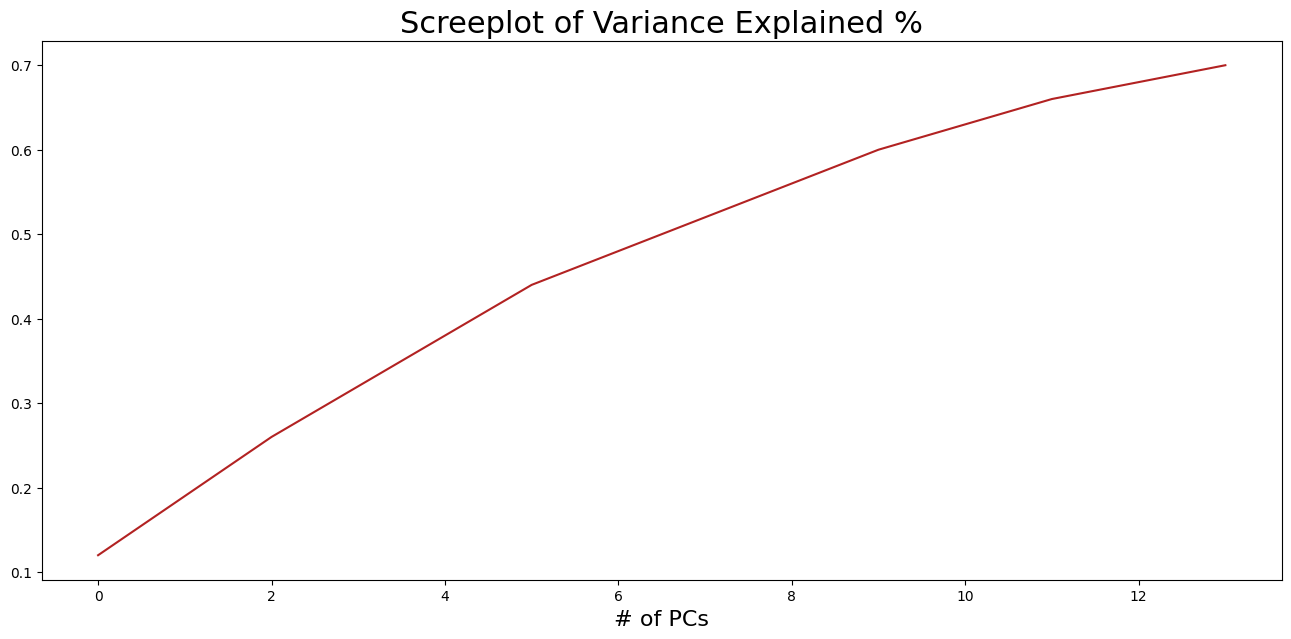

In [16]:
variance_exp_cumsum = pca.explained_variance_ratio_.cumsum().round(2)
fig, axes = plt.subplots(1,1,figsize=(16,7), dpi=100)
plt.plot(variance_exp_cumsum, color='firebrick')
plt.title('Screeplot of Variance Explained %', fontsize=22)
plt.xlabel('# of PCs', fontsize=16)
plt.show()

In [19]:
pca_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-0.604105,-0.819422,0.238892,-0.270389,-1.306637,-0.652098,0.269963,1.937162,-0.959585,0.485091,0.412231,-0.798066,0.259921,0.609079
1,-0.714525,-0.902383,0.250052,-1.253288,-1.219482,-0.490956,-0.102255,0.202047,-0.795530,0.009971,0.168516,-0.713585,-0.124541,-0.655854
2,-1.092104,0.733364,-0.176084,-0.145397,0.439406,0.531051,-0.949138,-0.673340,1.607340,-0.937639,-0.503718,0.093266,0.176403,0.145839
3,-0.241502,0.377959,-0.447610,-0.798102,-0.194653,1.157785,0.500190,1.339628,0.282890,-1.667356,-0.187459,0.670151,-0.314054,-0.248120
4,-1.465296,1.043056,-1.362919,1.233223,-0.867129,-0.892260,-0.848456,-0.162949,0.943938,-0.136354,0.403345,-0.242258,0.779363,0.409992


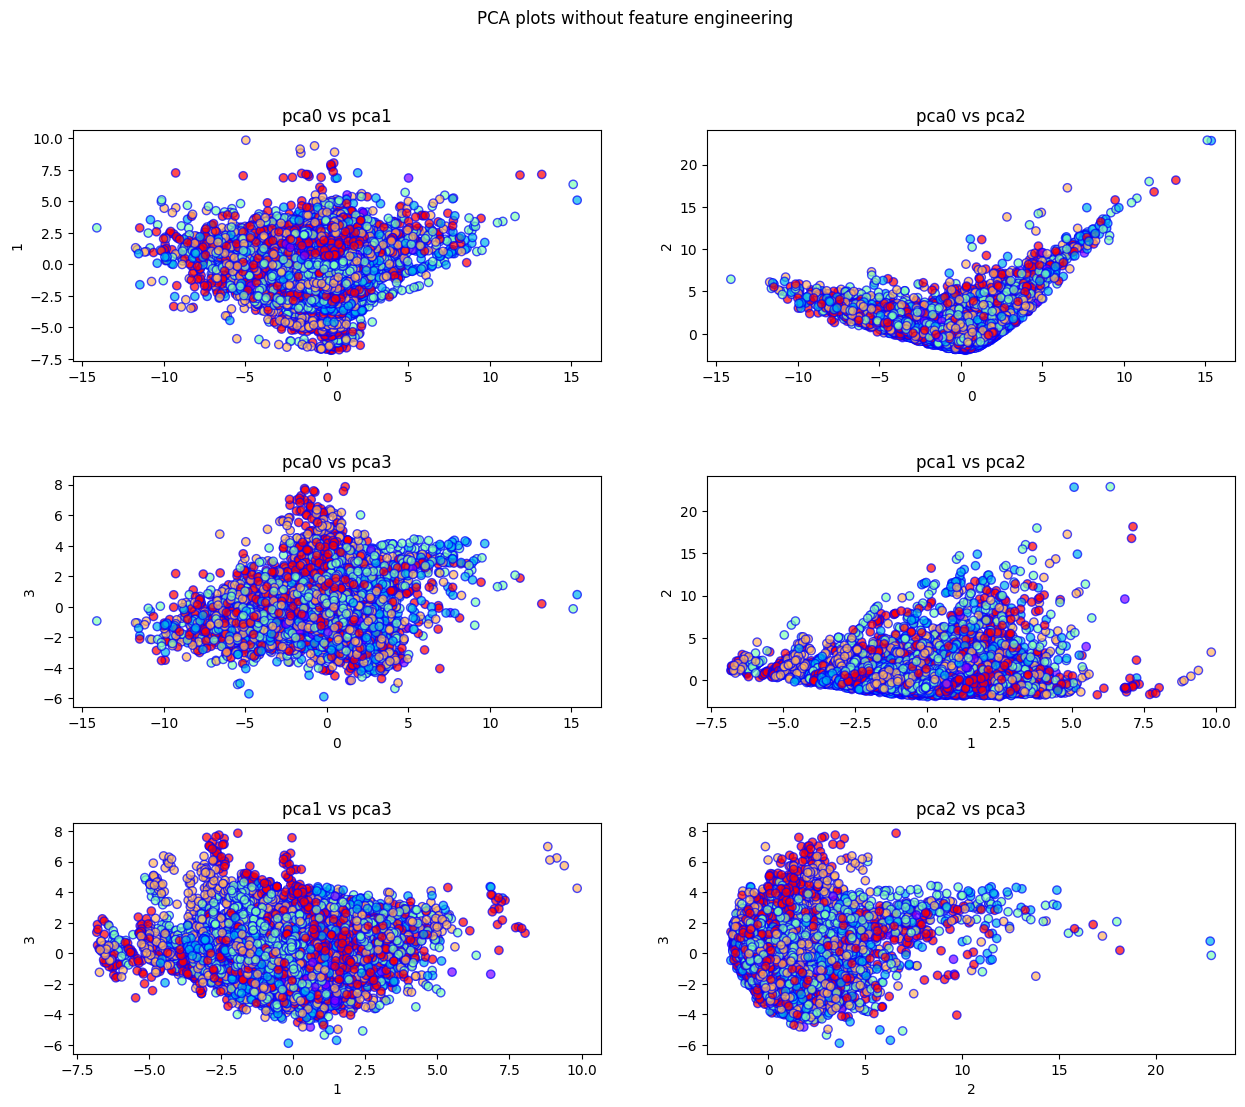

In [36]:
from itertools import combinations
plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("PCA plots without feature engineering")
n=1
for col1, col2 in combinations(pca_data.columns[:4], 2):
    ax = plt.subplot(3, 2, n)
    
    ax.set_xlabel(col1)
    ax.set_ylabel(col2)
    ax.set_title("pca{} vs pca{}".format(col1, col2)) 
    plt.scatter(pca_data[col1], pca_data[col2],c=target, label=target.unique(),cmap='rainbow',
  alpha=0.7,edgecolors='b')
    #plt.show()
    n=n+1


2023/11/13 22:23:43 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '4f06308a619e486bb39b17e1006e5219', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2023/11/13 22:23:49 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Escritorio\Personal_brand\Data_Science\Portfolio\python_envs\projects_env\Lib\site-packages\mlflow\data\digest_utils.py:26: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead."
2023/11/13 22:36:56 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: The configured tracking uri scheme: 'file' is invalid for use with the proxy mlflow-artifact scheme. The allowed tracking schemes are: {'http', 'https'}


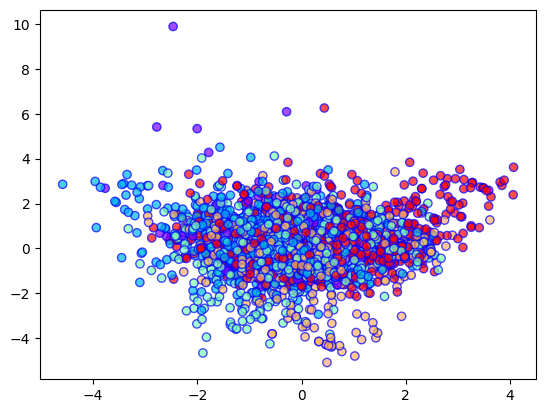

In [17]:
#LDA
# necessary import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
 

# divide the dataset into class and target variable
X = encoded_cat[:7000]
y = target[:7000]
 
# Preprocess the dataset and divide into train and test
le = LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
 
# apply Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis(n_components=2)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)
 
# plot the scatterplot
plt.scatter(
    X_train[:,0],X_train[:,1],c=y_train,cmap='rainbow',
  alpha=0.7,edgecolors='b'
)
 


In [44]:
import pandas as pd
all_data=pd.read_csv("../eda_features_engineering_model_antonio/preliminary_features.csv")
all_data.drop('Unnamed: 0', inplace=True, axis=1)

In [46]:
columns_to_drop=["Name","Description","RescuerID","PetID"]

In [45]:
import prince

all_data.set_index("AdoptionSpeed", inplace=True)
all_data.drop(columns_to_drop, axis=1, inplace=True)
famd = prince.FAMD(
    n_components=2,
    n_iter=30,
    copy=True,
    check_input=True,
    random_state=42,
    engine="sklearn",
    handle_unknown="error" 
)
famd = famd.fit(all_data)


c:\Escritorio\Personal_brand\Data_Science\Portfolio\python_envs\projects_env\Lib\site-packages\prince\pca.py:175: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[-1.309819937666527, -1.5759920436923156, -1.2327943296999841, -0.8651016219569416, -0.6492555855907295, -0.575609981542597, -0.4364975242341204, -0.43747863925980707, -0.3299982356834406, -0.3126526997403612, -0.24359187857939482, -0.7545600314141347, -0.1504567654076501, -0.21677042880904482, -0.19112370555136998, -0.18333812731388036, -0.18612316970832976, -0.31127839550608155, -0.1360932649166452, -0.13546173823797253, -0.11341105409720433, -0.09973296994832168, -0.06415498033091806, -0.6206255222163309, -0.06929529867268941, -0.09352115103108241, -0.0944335741111058, -0.09166906365694018, -0.1322588801568993, -0.17715372970138443, -0.08784782475886016, -0.07965730651427973, -0.0472167870555529, -0.055559842745866034, -0.034647649336344705, -0.48223041673168776, -0.05856521650590678, -0.03703989

In [47]:
famd.row_coordinates(all_data).head()

c:\Escritorio\Personal_brand\Data_Science\Portfolio\python_envs\projects_env\Lib\site-packages\prince\pca.py:175: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[-1.309819937666527, -1.5759920436923156, -1.2327943296999841, -0.8651016219569416, -0.6492555855907295, -0.575609981542597, -0.4364975242341204, -0.43747863925980707, -0.3299982356834406, -0.3126526997403612, -0.24359187857939482, -0.7545600314141347, -0.1504567654076501, -0.21677042880904482, -0.19112370555136998, -0.18333812731388036, -0.18612316970832976, -0.31127839550608155, -0.1360932649166452, -0.13546173823797253, -0.11341105409720433, -0.09973296994832168, -0.06415498033091806, -0.6206255222163309, -0.06929529867268941, -0.09352115103108241, -0.0944335741111058, -0.09166906365694018, -0.1322588801568993, -0.17715372970138443, -0.08784782475886016, -0.07965730651427973, -0.0472167870555529, -0.055559842745866034, -0.034647649336344705, -0.48223041673168776, -0.05856521650590678, -0.03703989

component,0,1
AdoptionSpeed,,
2,-3.222423,-6.946965
0,-0.127812,-0.242341
0,-0.288603,-1.027339
3,3.443610,2.904990
3,3.072067,3.257119


In [48]:
famd.column_coordinates_

component,0,1
variable,,
Fee,0.019870,0.005411
PhotoAmt,0.020589,0.006383
AgeScaled,0.137334,0.000307
FeeScaled,0.019870,0.005411
QuantityScaled,0.255650,0.102371
Breed1AgeFurLength,0.009941,0.000298
VDSCombination,0.084852,0.002766
TotalVisualMedia,0.019108,0.007279
SentimentScore,0.007135,0.001635


In [49]:
famd.plot(
    all_data[:1000],
    x_component=0,
    y_component=1
)

c:\Escritorio\Personal_brand\Data_Science\Portfolio\python_envs\projects_env\Lib\site-packages\prince\pca.py:175: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[-1.1489125293076057, -1.6340134638368193, -1.2806248474865698, -0.9433981132056602, -0.7071067811865476, -0.4, -0.42426406871192845, -0.3872983346207417, -0.24494897427831783, -0.282842712474619, -0.22360679774997896, -0.8306623862918076, nan, nan, -0.17320508075688773, -0.2, -0.1, nan, nan, nan, -0.7141428428542849, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, -0.45825756949558405, nan, nan, nan, nan, nan, nan, nan, nan, nan, -0.1414213562373095, -0.34641016151377546, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, -0.36055512754639896, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan

alt.LayerChart(...)

In [50]:
famd.column_contributions_.style.format('{:.2%}')

component,0,1
variable,,
Fee,0.04%,0.02%
PhotoAmt,0.05%,0.02%
AgeScaled,0.31%,0.00%
FeeScaled,0.04%,0.02%
QuantityScaled,0.58%,0.31%
Breed1AgeFurLength,0.02%,0.00%
VDSCombination,0.19%,0.01%
TotalVisualMedia,0.04%,0.02%
SentimentScore,0.02%,0.00%


## Part 2: Class separability with feature engineering:



In [38]:
import pandas as pd
all_data=pd.read_csv("../eda_features_engineering_model_antonio/preliminary_features.csv")
all_data.drop('Unnamed: 0', inplace=True, axis=1)

In [39]:
all_data.columns

Index(['Type', 'Name', 'Age', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2',
       'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
       'Sterilized', 'Health', 'Quantity', 'Fee', 'State', 'RescuerID',
       'VideoAmt', 'Description', 'PetID', 'PhotoAmt', 'AdoptionSpeed',
       'AgeScaled', 'FeeScaled', 'QuantityScaled', 'Breed1AgeFurLength',
       'VDSCombination', 'ColorCount', 'TotalVisualMedia', 'DescriptionLength',
       'SentimentScore', 'Energy', 'Contrast', 'Correlation', 'Entropy',
       'Mean', 'Std_Dev', 'num_checkpoints'],
      dtype='object')

In [40]:
# Import libraries
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mlflow import MlflowClient
import mlflow

#mlflow.autolog() 
# Create a dummy dataframe with both categorical and numerical columns

columns_to_drop=["Name","Description","RescuerID","PetID"]
categorical_columns=["Type",'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2',
       'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
       'Sterilized', 'Health',"State"]
numerical_columns=['SentimentScore', 'Energy', 'Contrast', 'Correlation',
       'Entropy', 'Mean', 'Std_Dev', 'num_checkpoints','PhotoAmt','VideoAmt',"Age","Quantity","Fee"]

target=all_data["AdoptionSpeed"]
all_data=all_data.drop("AdoptionSpeed", axis=1)



#simple filling
all_data[categorical_columns] = all_data[categorical_columns].fillna("unknown")
all_data.fillna(all_data[numerical_columns].median(), inplace=True)
#all_data=all_data.fillna(0)

#transformation
all_data[categorical_columns]=all_data[categorical_columns].astype(str)
all_data[numerical_columns]=all_data[numerical_columns].astype(float)

all_data=all_data.drop(columns_to_drop, axis=1)

#normalize numerical columns:

for column in numerical_columns:
  all_data[numerical_columns] = (all_data[numerical_columns] - all_data[numerical_columns].mean()) / all_data[numerical_columns].std()


# Perform one-hot encoding on the categorical columns
encoder = OneHotEncoder(sparse=False)
encoded_cat = encoder.fit_transform(all_data[categorical_columns])
encoded_cat = pd.DataFrame(encoded_cat, columns=encoder.get_feature_names_out(categorical_columns))

# Concatenate the encoded categorical columns and the numerical columns
X = pd.concat([encoded_cat, all_data[numerical_columns]], axis=1)

# Perform PCA on the combined data
pca = PCA(n_components=14, )
pca_data = pca.fit_transform(X)

c:\Escritorio\Personal_brand\Data_Science\Portfolio\python_envs\projects_env\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [41]:
pca_data = pd.DataFrame(pca_data)
print(pca.explained_variance_ratio_)

print(pca.components_)


[0.12700283 0.0818032  0.07040398 0.06507747 0.06149999 0.05020558
 0.04831891 0.04573532 0.04447701 0.03910358 0.03444914 0.02781851
 0.02519955 0.02393505]
[[-7.37783820e-02  7.37783820e-02 -4.39376537e-05 ... -3.15647065e-02
  -2.04131413e-02  6.60323066e-03]
 [ 6.94772235e-02 -6.94772235e-02  3.18650188e-05 ...  4.42597192e-01
  -5.28241593e-01  2.19803654e-01]
 [ 3.59068602e-02 -3.59068602e-02  9.08037450e-05 ... -4.37579146e-02
   1.63768712e-01  2.55360511e-04]
 ...
 [ 6.38560013e-02 -6.38560013e-02 -3.61600669e-05 ... -9.54158160e-02
   3.62475964e-02  3.09451250e-02]
 [ 7.90384120e-02 -7.90384120e-02  1.78438327e-05 ...  2.70344342e-01
  -9.83569216e-02  3.17851199e-02]
 [ 2.11736873e-02 -2.11736873e-02 -1.55402740e-04 ... -1.38752784e-02
   2.85344564e-01  5.94222183e-02]]


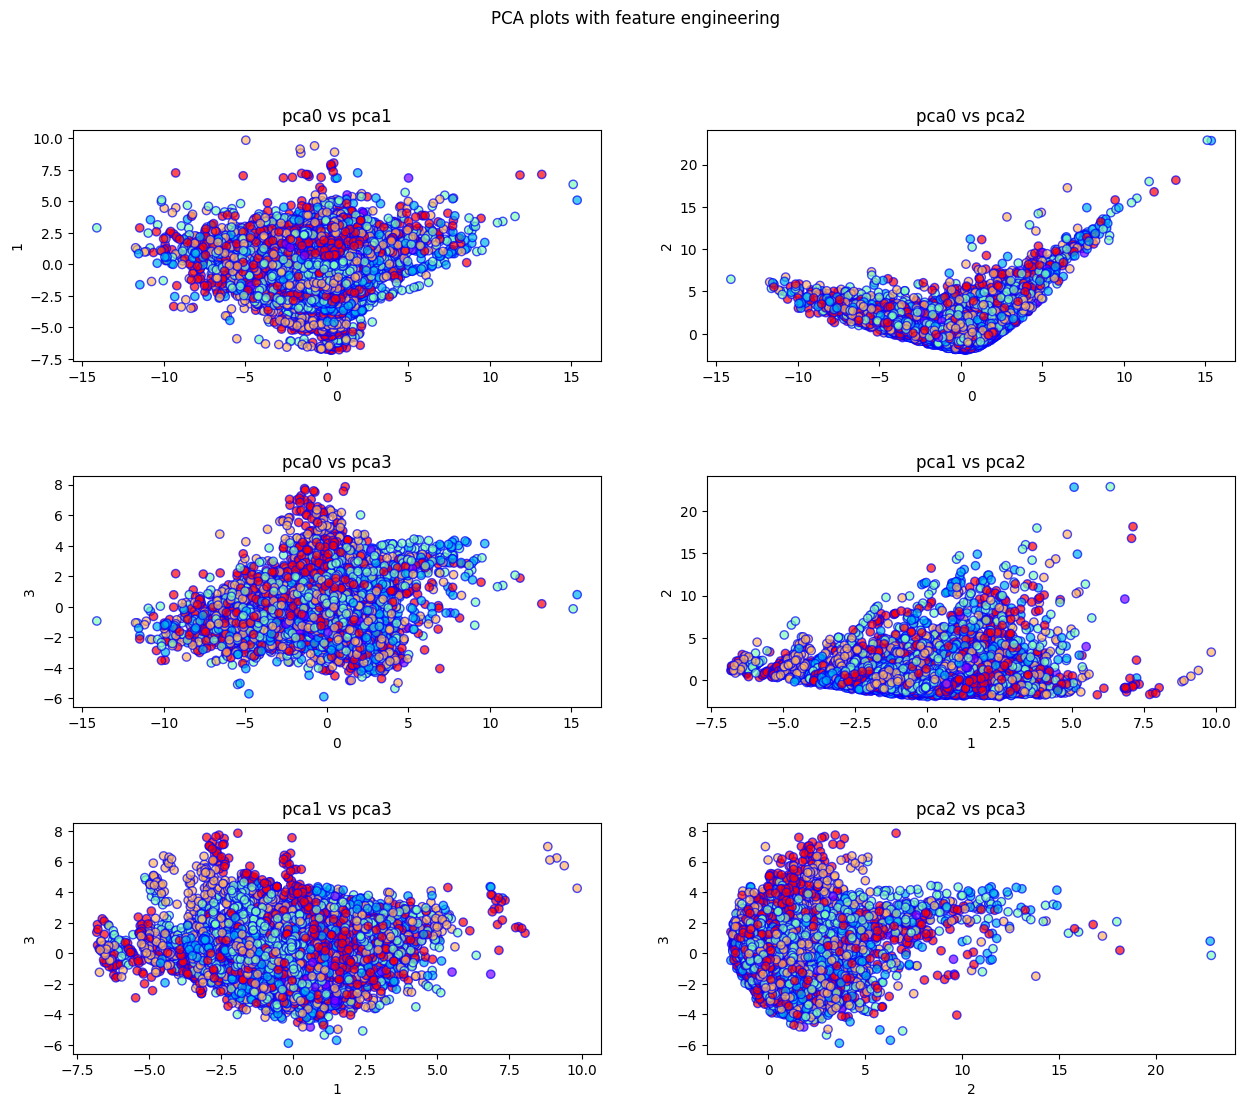

In [42]:
from itertools import combinations
plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("PCA plots with feature engineering")
n=1
for col1, col2 in combinations(pca_data.columns[:4], 2):
    ax = plt.subplot(3, 2, n)
    
    ax.set_xlabel(col1)
    ax.set_ylabel(col2)
    ax.set_title("pca{} vs pca{}".format(col1, col2)) 
    plt.scatter(pca_data[col1], pca_data[col2],c=target, label=target.unique(),cmap='rainbow',
  alpha=0.7,edgecolors='b')
    #plt.show()
    n=n+1


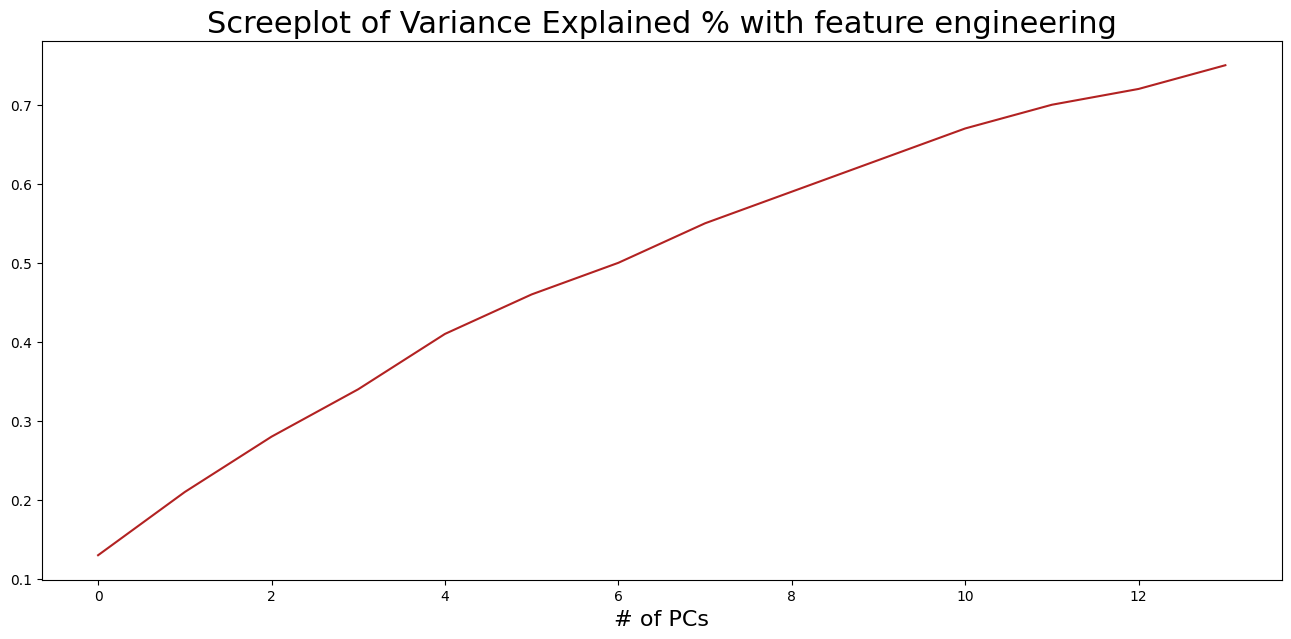

In [43]:
variance_exp_cumsum = pca.explained_variance_ratio_.cumsum().round(2)
fig, axes = plt.subplots(1,1,figsize=(16,7), dpi=100)
plt.plot(variance_exp_cumsum, color='firebrick')
plt.title('Screeplot of Variance Explained % with feature engineering', fontsize=22)
plt.xlabel('# of PCs', fontsize=16)
plt.show()